# COMP0142

# Assignment 1: Polynomial Regression & Regularization

## Introduction

In this assignment you will implement Polynomial regression and Regularization using the library Scikit-learn. 

In Part A of the assignment we will focus on Polynomial regression with and without regularization. First, we will load the train and test dataset and we will fit a simple polynomial of order 2 to see how to combine the classes `PolynomialFeatures` and `LinearRegression`. Then we will fit polynomials of different orders to the training data and we will compute the Mean Squared Error (MSE) of the train and test datasets. We will plot the MSE values to find out which polynomial order fits the data better. Afterwards we will select a specific polynomial degree and we will observe and analyse the impact of regularisation.

In Part B of the assignment we will apply a LASSO Regression model to the `mtcars.csv` dataset. We will observe how increasing the hyperparameter pushes the weight coefficients to zero more aggressively than in the case of Ridge Regression. 

## Guidelines

- The structure of the code is given to you and you will need to fill in the parts corresponding to each question. 
- You will have to submit the completed notebook in the Jupyter notebook format: `.ipynb`.
- Do not modify/erase other parts of the code if you have not been given specific instructions to do so.
- When you are asked to insert code, do so between the areas which begin:
  
  `##########################################################`
  
  `# TO_DO`
  
  `# [your code here]`
   
   And which end:
   
  `# /TO_DO
   ##########################################################`


- When you are asked to comment on the results you should give clear and comprehensible explanations. Write the comments in a 'Code Cell' with a sign `#` at the beginning of each row, and in the areas which begin:

  `# [INSERT YOUR ANSWER HERE]`

## Imports

Please do not change the cell below, you will see a number of imports. All these packages are relevant for the assignment and it is important that you get used to them. You can find more information about them in the respective documentations. The most relevant for this assignment is Scikit-learn:

https://scikit-learn.org/stable/

In [1]:
# PLEASE DO NOT CHANGE THIS CELL

import pandas as pd
import numpy as np

# Standard python libraries for data and visualisation
import matplotlib.pyplot as plt

# SciKit Learn a python ML Library
# Import models
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

# Import error metric
from sklearn.metrics import mean_squared_error

# Import data munging tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

# Load files
import pickle

# Part A: Polynomial Regression [80 marks]

In Lecture 4, we introduced a 1-dimensional input dataset, that gave rise to the following set of $n$ output,input pairs:

$$ \mathcal{S} =\{ (x^{(i)}, y^{(i)}) \}^{n}_{i=1}$$

We want to fit a polynomial of degree $k$ to form the following prediction function:

$$ f_k(x) =  w_0 + w_1 x + w_2 x^2 + \ldots + w_k x^k $$

We can transform this problem to a linear regression problem by transforming the input data:

$$\mathbf{X} = \left[\begin{array}{cccc}
1 & x^{(1)} & (x^{(1)})^2 & \dots & (x^{(1)})^k \\
1 & x^{(2)} & (x^{(2)})^2 & \dots & (x^{(2)})^k \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x^{(n)} & (x^{(n)})^2 & \dots & (x^{(n)})^k \\
\end{array}\right], 
\mathbf{y} = \left[\begin{array}{c}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(n)}
\end{array}\right], 
\mathbf{w} = \left[\begin{array}{c}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_k
\end{array}\right]
$$

`PolynomialFeatures` transforms the 1-dimensional array $[x^{(1)},...,x^{(n)}]^T$ into the matrix $\mathbf{X}$. Now, we can use the `LinearRegression` class to fit the data as we did during the regression class.

The loss function that the model is minimising is:

\begin{equation}
\mathsf{L}(\mathcal{E},\mathcal{S}, \mathbf{w}) = \Vert\mathbf{y}- \mathbf{Xw}\Vert^2_2
\end{equation}

We begin by loading the data and plotting it:

In [2]:
# PLEASE DO NOT CHANGE THIS CELL
# Load Data

with open('data_pol_fit.pkl', 'rb') as handle:
    data = pickle.load(handle)

X = data['X']
y = data['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

X_grid = np.linspace(-2,2,num=100)[:,np.newaxis]

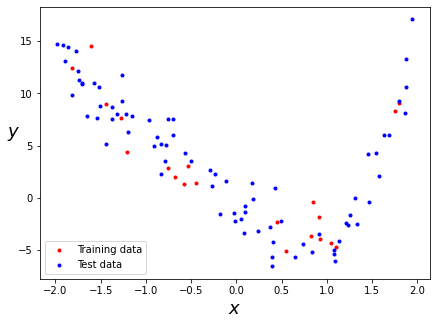

In [3]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x_train, y_train, c='r', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='b', marker='.', label="Test data")
ax.legend()
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

We fit a polynomial of order 2 to the training dataset and we plot the results:

In [4]:
# PLEASE DO NOT CHANGE THIS CELL

poly_features = PolynomialFeatures(degree=2)

x_train_poly = poly_features.fit_transform(x_train)
X_grid_poly = poly_features.fit_transform(X_grid)

lin_reg = LinearRegression()
lin_reg.fit(x_train_poly, y_train)

y_grid_pred = lin_reg.predict(X_grid_poly)

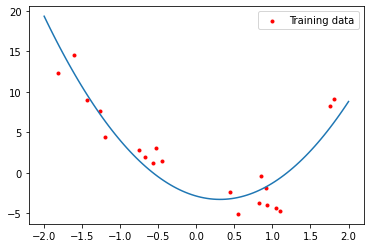

In [5]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots()
ax.scatter(x_train, y_train, c='r', marker='.', label="Training data")
ax.legend()
plt.plot(X_grid, y_grid_pred)
plt.show()

### _Question 1 [20 marks]_

Using the same approach fit 0-th to 10-th order polynomials to the training data. 
For each polynomial order you should:

- Create a Polynomial features instance (call it poly_features) and transform your training and test datasets
- Create a Linear regression model (call it lin_reg) and fit it with the train set
- Compute the predictions of the model for the train and test set
- Compute the Mean Square Error for the train and test set (think about using the `mean_squared_error` function for Scikit-learn) and append the values to mses_train and mses_test



In [6]:
########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

y_preds = []
mses_train = []
mses_test = []
max_degree = 10
for degree in range(max_degree+1):
#
########################################################

########################################################
# TO_DO
#[your code here]
    poly_features = PolynomialFeatures(degree = degree)
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.fit_transform(x_test)
    
    lin_reg = LinearRegression()
    lin_reg.fit(x_train_poly, y_train)
#lin_reg.fit(x_test_poly, y_test)
    y_test_pred = lin_reg.predict(x_test_poly)
    y_train_pred = lin_reg.predict(x_train_poly)
    
    mses_train.append(mean_squared_error(y_train, y_train_pred))
    mses_test.append(mean_squared_error(y_test, y_test_pred))



# /TO_DO
########################################################

########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

    X_grid_poly = poly_features.fit_transform(X_grid)
    y_grid_pred = lin_reg.predict(X_grid_poly)
    y_preds.append(y_grid_pred)
#
########################################################

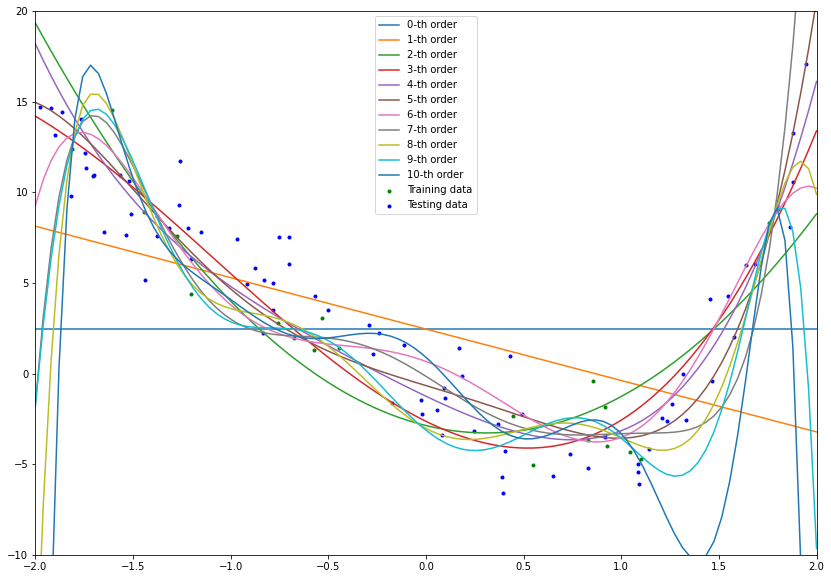

In [7]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(x_train, y_train, c='g', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='b', marker='.', label="Testing data")

for degree in range(0,max_degree+1):
    ax.plot(X_grid, y_preds[degree], label="{}-th order".format(degree))

ax.axis([-2, 2, -10, 20])
ax.legend()
plt.show()

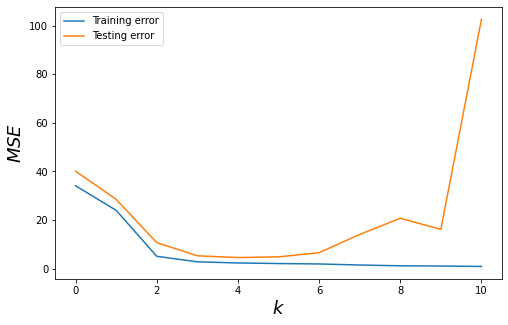

In [8]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(mses_train, label="Training error")
ax.plot(mses_test, label="Testing error")
plt.xlabel("$k$", fontsize=18)
plt.ylabel("$MSE$",fontsize=18)
ax.legend()
#ax.axis([0, 10, 0, 40])
plt.show()

### _Question 2 [20 marks]_
What is your interpretation of the mean squared error plot? What is happening between $k = 0$ and $k = 10$? Which polynomial order you think fits better the data?

In [9]:
# [INSERT YOUR ANSWER HERE] 
#When k = 0, the MSE is high for both training and test data. At this point, the model could be considered to be underfitting because it is not complex enough to represent the target variables. As the k increases to 10, we can see that MSE for the training data decreases but increases for the test data. This means that our model is overfitting. The model fits the residual variation and fails to represent the structure of out-of-sample data. Hence, the order polynomial of 4 fits better and encompass the input/output relationship better than the other two orders. 

### Regularization

In this section, we will analyse the impact of regularization in the model fitting. 

We will implement Polynomial Ridge Regression so the loss function is:

\begin{equation}
\mathsf{L}(\mathcal{E},\mathcal{S},\mathbf{w}) = \Vert\mathbf{y}- \mathbf{Xw}\Vert^2_2 + \lambda \Vert\mathbf{w}\Vert^2_2
\end{equation}

where $\lambda$ is the regularization parameter.

To observer the impact of regularization we will specify that the polynomial order is 6 (we could have chosen any another order) and we will fit the polynomial regression with different $\lambda$ values.

We will use the `Ridge` Scikit-learn class. You can find information and examples of how to use it in:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

### _Question 3 [20 marks]_

Fit a 6-th order polynomial to the training data.

For each polynomial order you should:

- Create a Ridge regression model `Ridge` (call it ridge_reg) with the lambda_value and fit it to the train set
- Compute the predictions of the model for the train and test set
- Compute the Mean Square Error for the train and test set (think about using the `mean_squared_error` function for Scikit-learn) and append the values to mses_train and mses_test


In [10]:
# PLEASE DO NOT CHANGE THIS CELL

lambda_list = np.logspace(-3.0, 2.0, num=20)
print(lambda_list)

[1.00000000e-03 1.83298071e-03 3.35981829e-03 6.15848211e-03
 1.12883789e-02 2.06913808e-02 3.79269019e-02 6.95192796e-02
 1.27427499e-01 2.33572147e-01 4.28133240e-01 7.84759970e-01
 1.43844989e+00 2.63665090e+00 4.83293024e+00 8.85866790e+00
 1.62377674e+01 2.97635144e+01 5.45559478e+01 1.00000000e+02]


In [11]:
########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

y_preds = []
mses_train = []
mses_test = []

poly_features = PolynomialFeatures(degree=6)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)
X_grid_poly = poly_features.fit_transform(X_grid)

for lambda_value in lambda_list:
#
#########################################################

#########################################################
# TO_DO
#[your code here]
    ridge_reg = Ridge(alpha=lambda_value)
    ridge_reg.fit(x_train_poly, y_train)
    
    y_train_pred = ridge_reg.predict(x_train_poly)
    y_test_pred = ridge_reg.predict(x_test_poly)

    mses_train.append(mean_squared_error(y_train, y_train_pred))
    mses_test.append(mean_squared_error(y_test, y_test_pred))
  
    
# /TO_DO
#########################################################

#########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

    y_grid_pred = ridge_reg.predict(X_grid_poly)
    y_preds.append(y_grid_pred)
#
#########################################################

We plot the MSE of the train and test set for each lamba_value:

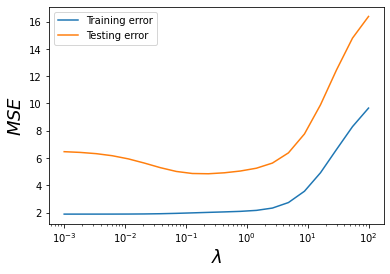

In [12]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots()
ax.plot(lambda_list,mses_train, label="Training error")
ax.plot(lambda_list,mses_test, label="Testing error")
ax.legend()
plt.xlabel("$\lambda$", fontsize=18)
plt.ylabel("$MSE$",fontsize=18)
ax.set_xscale('log')
plt.show()

In [13]:
# PLEASE DO NOT CHANGE THIS CELL

lambda_argmin = np.argmin(mses_test)
lambda_opt  = lambda_list[lambda_argmin]
print(lambda_opt)

0.23357214690901212


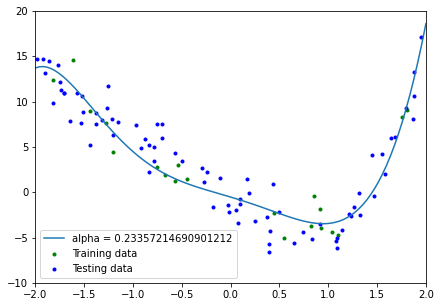

In [14]:
# PLEASE DO NOT CHANGE THIS CELL

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x_train, y_train, c='g', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='b', marker='.', label="Testing data")

ax.plot(X_grid, y_preds[lambda_argmin], label="alpha = {}".format(lambda_opt)) 

ax.axis([-2, 2, -10, 20])
ax.legend()
plt.show()

### _Question 4 [20 marks]_
What is your interpretation of the mean squared error plot? What happens when $\lambda$ increases? Is the regularization working?

In [15]:
# [INSERT YOUR ANSWER HERE]

#As 𝜆  increases, it gradually decreases MSE for the testing set because the model became less complex. In the previous section, we discovered that the polynomial order of 6 was too complex which started to overfit the data. Hence, reducing the complexity would improve the model. However, after 𝜆 reaches its optimal point, 0.234, MSE increases because the model became too simple. In this case, the model would start to underfit the data. Overall, the regularisation is working. 

# Part B: LASSO Regression [20 marks]

In this part of the Assignment, we will analyse the impact of $l1$-regularization in linear regression. We will apply LASSO Regression, so now the loss function is:

\begin{equation}
\tilde L(\mathcal{E},\mathcal{S},w) = ||\mathbf{y}- \mathbf{Xw}||^2_2 + \lambda ||\mathbf{w}||_1
\end{equation}

where $\lambda$ is the regularization parameter.

We will observe how this method shrinks some weights more aggressively to zero by using a range of different $\lambda$ values.

We will use the `Lasso` Scikit-learn class. You can find information and examples of how to use it in:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

First, we load the `mtcars.csv` file that contains data about car characteristics. 
It contains 11 car attributes and we will use Miles per gallon (mpg) as our target value.

1. 	cyl:	Number of cylinders
2. 	disp:   Displacement (cu.in.)
3. 	hp:	    Gross horsepower
4. 	drat:	Rear axle ratio
5. 	wt: 	Weight (1000 lbs)
6. 	qsec: 	1/4 mile time
7. 	vs: 	Engine (0 = V-shaped, 1 = straight)
8. 	am: 	Transmission (0 = automatic, 1 = manual)
9. 	gear: 	Number of forward gears
10. carb: 	Number of carburetors 
11. mpg: 	Miles/(US) gallon

In [16]:
# PLEASE DO NOT CHANGE THIS CELL

data = pd.read_csv('mtcars.csv', index_col = 0)
data.head()

,brand,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg
0,Mazda RX4,6,160.0,110,3.90,2.620,16.46,0,1,4,4,21.0
1,Mazda RX4 Wag,6,160.0,110,3.90,2.875,17.02,0,1,4,4,21.0
2,Datsun 710,4,108.0,93,3.85,2.320,18.61,1,1,4,1,22.8
3,Hornet 4 Drive,6,258.0,110,3.08,3.215,19.44,1,0,3,1,21.4
4,Hornet Sportabout,8,360.0,175,3.15,3.440,17.02,0,0,3,2,18.7


In [17]:
# PLEASE DO NOT CHANGE THIS CELL

X = data.iloc[:,1:-1]
y = data.iloc[:,-1]
#X_colLabels = X.columns[1:-1]
X_colLabels = X.columns[:]

X = preprocessing.scale(X)
y = preprocessing.scale(y)

### _Question 5 [10 marks]_

Now, do the following:

- Apply a Ridge and a LASSO regression to the dataset `X` with target values `y` for each lambda value and append the weights/coefficients of each model in the lists `weights_ridge` and `weights_lasso`(check the `.coef_` method for the `Ridge` and `Lasso` class).

In [18]:
########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

lambda_list = np.logspace(-5.0, 5, num=100)

weights_ridge = []
weights_lasso = []

for lambda_value in lambda_list:
    
#
#######################################################

    #######################################################
    # TO_DO
    ridge_reg = Ridge(alpha=lambda_value)
    ridge_reg.fit(X, y)
    
    y_ridge_pred = ridge_reg.predict(X)
    weights_ridge.append(ridge_reg.coef_)
    
    lasso_reg = Lasso(alpha=lambda_value,normalize=True, max_iter=1e5)
    lasso_reg.fit(X,y)
    
    y_lasso_pred = lasso_reg.predict(X)
    weights_lasso.append(lasso_reg.coef_)


    
    
    
    
    # /TO_DO
    ##########################################################

Here we can see how the weights are pushed to zero more aggresively for the LASSO regression in comparison to the Ridge regression:

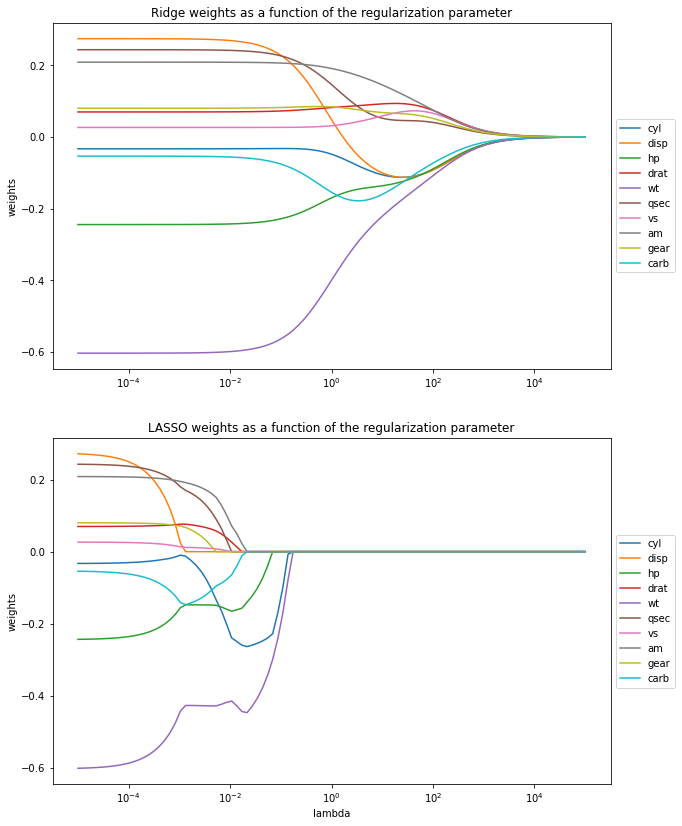

In [19]:
# PLEASE DO NOT CHANGE THIS CELL

fig = plt.figure(figsize = (10,14))
ax = fig.add_subplot(211)
ax.plot(lambda_list, weights_ridge)
ax.set_xscale('log')
ax.legend(labels = X_colLabels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('weights')
plt.title('Ridge weights as a function of the regularization parameter')

ax = fig.add_subplot(212)
ax.plot(lambda_list, weights_lasso)
ax.set_xscale('log')
ax.legend(labels = X_colLabels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('LASSO weights as a function of the regularization parameter')
plt.show()

### _Question 6 [10 marks]_

Finally, do the following:

- Compute in which order the attributes weights go to zero when we increase the lambda value using `weights_lasso` and `X_colLabels`.

In [20]:
########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

weights_ordering = []
    
#
#######################################################

#######################################################
# TO_DO
#[your code here]
df_lasso = pd.DataFrame(weights_lasso, columns = X_colLabels, index=None)
weights_ordering.append(df_lasso.loc[df_lasso['cyl']==0])



# /TO_DO
##########################################################

########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

print(weights_ordering)

#
##################

[    cyl  disp   hp  drat   wt  qsec   vs   am  gear  carb
42 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
43 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
44 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
45 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
46 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
47 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
48 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
49 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
50 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
51 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
52 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
53 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
54 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
55 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
56 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
57 -0.0  -0.0 -0.0   0.0 -0.0   0.0  0.0  0.0   0.0  -0.0
58 -0.0  -0.0